In [135]:
import pandas as pd
# datasets have no missing values
df = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")
# df = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv")

# datasets below have 10 columns instead of 11, doesn't have 'remaining_lease'
# df = pd.read_csv("resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv")
# df = pd.read_csv("resale-flat-prices-based-on-approval-date-2000-feb-2012.csv")
# df = pd.read_csv("resale-flat-prices-based-on-approval-date-1990-1999.csv")
df['month'] = pd.to_datetime(df['month'])
df['Year'] = df['month'].apply(lambda x: x.year)
df['Month'] = df['month'].apply(lambda x: x.month)

df = df[df['Year'] == 2019]
df.sample()



df['remaining_lease'] = 99 - (2019 - df['lease_commence_date'])
df['house_age'] = df['Year'] - df['lease_commence_date']
df['flat_type_model'] = df['flat_type']+' '+df['flat_model']
df = df.drop(columns = ['flat_model','flat_type'])
df.head()
df = df[df['Year'] == 2019]
df = df.drop(columns = ['Year','month','block','street_name'])

In [136]:
df

,town,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,Month,house_age,flat_type_model
42070,ANG MO KIO,01 TO 03,68.0,1981,61,270000.0,1,38,3 ROOM New Generation
42071,ANG MO KIO,04 TO 06,73.0,1976,56,295000.0,1,43,3 ROOM New Generation
42072,ANG MO KIO,07 TO 09,67.0,1978,58,270000.0,1,41,3 ROOM New Generation
42073,ANG MO KIO,01 TO 03,67.0,1978,58,230000.0,1,41,3 ROOM New Generation
42074,ANG MO KIO,01 TO 03,68.0,1981,61,262500.0,1,38,3 ROOM New Generation
...,...,...,...,...,...,...,...,...,...
64251,YISHUN,04 TO 06,142.0,1988,68,580000.0,12,31,EXECUTIVE Apartment
64252,YISHUN,07 TO 09,146.0,1988,68,565000.0,12,31,EXECUTIVE Maisonette
64253,YISHUN,01 TO 03,164.0,1992,72,633000.0,12,27,EXECUTIVE Apartment
64254,YISHUN,10 TO 12,164.0,1992,72,788888.0,12,27,EXECUTIVE Apartment


In [137]:
df['town'].unique()


array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [138]:
from sklearn.preprocessing import LabelEncoder
# Process columns and apply LabelEncoder to categorical features
lbl = LabelEncoder() 
lbl.fit(list(df['storey_range'].values)) 
df['storey_range'] = lbl.transform(list(df['storey_range'].values))

lbl.fit(list(df['storey_range'].values)) 
df['storey_range'] = lbl.transform(list(df['storey_range'].values))

# Check shape        
print('Shape all_data: {}'.format(df.shape))

Shape all_data: (22186, 9)


In [139]:
# turn all towns into their respective region, then turn it into nominal values afterwards for easy modelling.
df['region'] = df['town'].map({'ANG MO KIO':'North_East',
                             'BEDOK': 'East',
                             'BISHAN':'Central',
                             'BUKIT BATOK':'West',
                             'BUKIT MERAH':'Central',                 
                             'BUKIT PANJANG':'West',
                             'BUKIT TIMAH':'Central',
                             'CENTRAL AREA':'Central',
                             'CHOA CHU KANG':'West',
                             'CLEMENTI':'West',
                             'GEYLANG':'Central',
                             'HOUGANG':'North_East',
                             'JURONG EAST':'West',
                             'JURONG WEST':'West',
                             'KALLANG/WHAMPOA':'Central',
                             'MARINE PARADE':'Central',
                             'PASIR RIS': 'East',
                             'PUNGGOL':'North_East',
                             'QUEENSTOWN':'Central',
                             'SEMBAWANG': 'North',
                             'SENGKANG':'North_East',
                             'SERANGOON':'North_East',
                             'TAMPINES': 'East',
                             'TOA PAYOH':'Central',
                             'WOODLANDS': 'North',
                             'YISHUN': 'North'})
df['region_encoded'] = df['region'].map({'West':1,'North':2, 'North_East':3,'East':4,'Central':5})

In [140]:
# remove town and region since we won't need it anymore.
df = df.drop(columns = ['town','region'])
# all_data.head()

In [141]:
df = df.sample(frac=1).reset_index(drop=True)
# shuffled the dataframe to help split train and test datasets later
# https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows

In [142]:
df.head()

,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,Month,house_age,flat_type_model,region_encoded
0,1,68.0,1980,60,280000.0,9,39,3 ROOM New Generation,4
1,1,82.0,1979,59,318000.0,5,40,3 ROOM New Generation,3
2,4,110.0,2003,83,720000.0,2,16,5 ROOM Improved,5
3,3,127.0,1996,76,680000.0,5,23,5 ROOM Improved,5
4,0,46.0,1970,50,200000.0,10,49,2 ROOM Standard,5


In [143]:
df['resale_price'].describe()

count    2.218600e+04
mean     4.321379e+05
std      1.539757e+05
min      1.500000e+05
25%      3.200000e+05
50%      4.000000e+05
75%      5.100000e+05
max      1.205000e+06
Name: resale_price, dtype: float64

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
from scipy.stats import norm
from scipy import stats
from scipy.stats import skew
import lightgbm as lgb
# install lightgbm that is compatible for win64
from scipy.stats.stats import pearsonr
from collections import Counter
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline
# import xgboost as xgb
# import libxgboost as lxgb
# able to install libxgboost (compatible for win64) but unable to import


 mu = 432137.91 and sigma = 153972.22



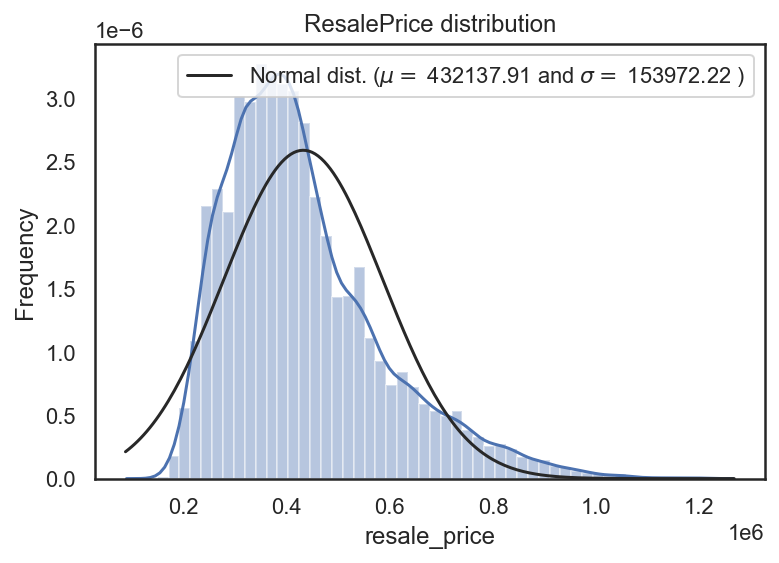

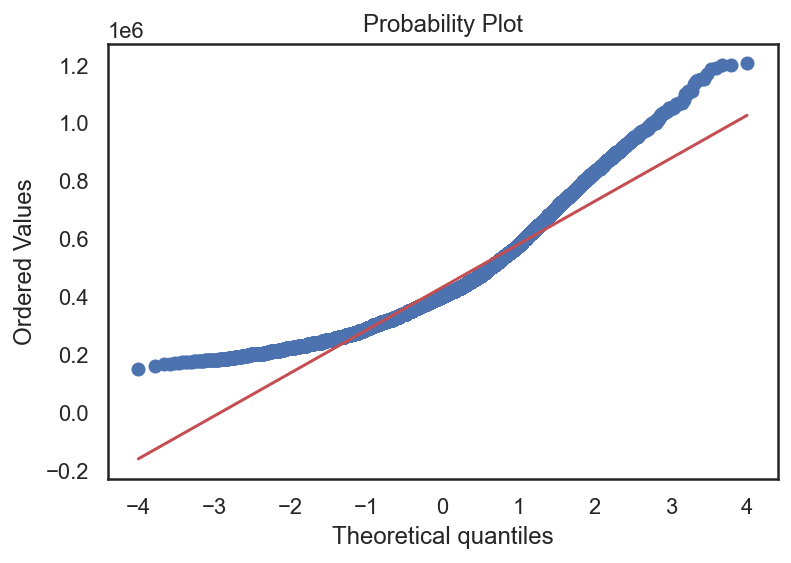

Skewness: 1.103113
Kurtosis: 1.281708


In [145]:
import seaborn as sns
sns.distplot(df['resale_price'], fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['resale_price'])
# mu refers to mean
# sigma refers to standard deviation
# https://www.quora.com/How-do-you-explain-mu-and-sigma-in-statistics-to-a-layman#:~:text=Mu%20is%20the%20arithmetic%20mean,sigma%20to%20mu%2B2*sigma

print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('ResalePrice distribution')

fig = plt.figure()
res = stats.probplot(df['resale_price'], plot=plt)
plt.show()

print("Skewness: %f" % df['resale_price'].skew())
print("Kurtosis: %f" % df['resale_price'].kurt())

# Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. 
# That is, data sets with high kurtosis tend to have heavy tails, or outliers. 
# Data sets with low kurtosis tend to have light tails, or lack of outliers. 
# A uniform distribution would be the extreme case.

In [146]:
# multivariate analysis
# checking categorical data
df.select_dtypes(include=['object']).columns

Index(['flat_type_model'], dtype='object')

In [147]:
#Checking numerical data
df.select_dtypes(include=['int64','float64']).columns

Index(['storey_range', 'floor_area_sqm', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'Month', 'house_age',
       'region_encoded'],
      dtype='object')

In [148]:
# Total number of features
cat = len(df.select_dtypes(include=['object']).columns)
num = len(df.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+', num, 'numerical', '=', cat+num, 'features')

Total Features:  1 categorical + 8 numerical = 9 features


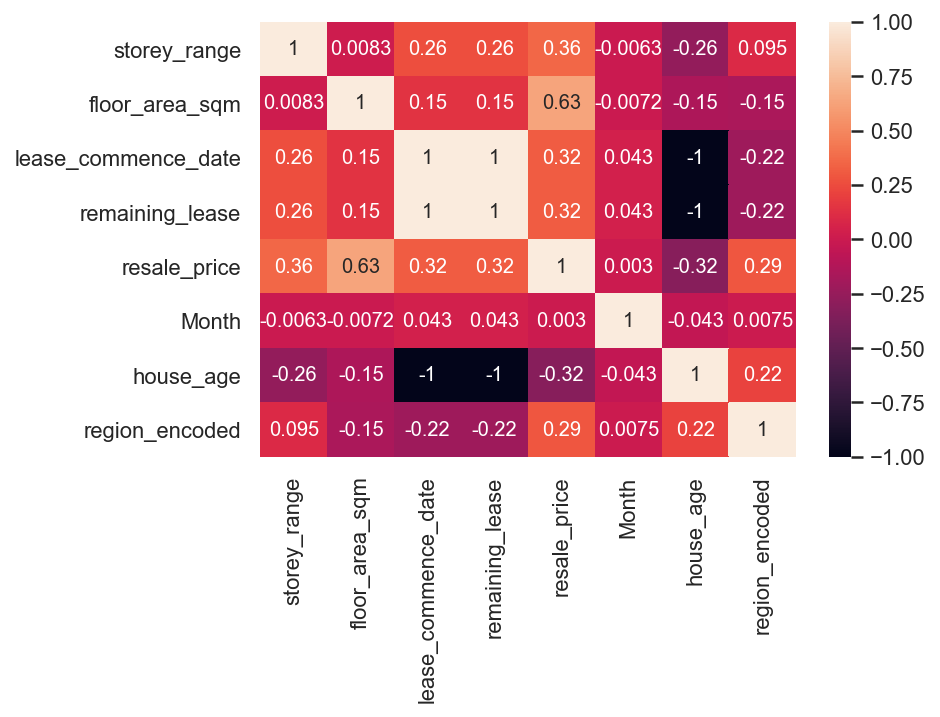

In [149]:
# Correlation Matrix Heatmap
corrmat = df.corr()
sns.heatmap(corrmat, annot=True);

In [150]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,resale_price
1,floor_area_sqm
2,lease_commence_date


In [151]:
# # floor_area_sqm vs resale_price using box plot
# var = 'floor_area_sqm'
# data = pd.concat([df['resale_price'], df[var]], axis=1)
# f, ax = plt.subplots(figsize=(50, 10))
# fig = sns.boxplot(x=var, y="resale_price", data=data)
# fig.axis(ymin=1000, ymax=1400000);
# # positive correlation: higher price for larger floor area

In [152]:
# # floor_area_sqm vs resale_price using joint plot
# sns.jointplot(x=df['floor_area_sqm'], y=df['resale_price'], kind='reg')
# # cannot see pearson r score
# # no need to remove any outlier here i think

In [153]:
# # lease_commence_date vs resale_price using boxplot
# sns.boxplot(x=df['lease_commence_date'], y=df['resale_price'])
# # increasing through the years? thinking it is more of a categorical variable than numerical?

In [154]:
# Check if there are any missing values in the dataset
target = df.resale_price.values
all_data = df.reset_index(drop=True)
all_data.drop(['resale_price'], axis=1, inplace=True)
print("Train data size is : {}".format(df.shape))
print("New dataset size is : {}".format(all_data.shape))
all_data.isnull().sum()
# no missing data

# Find Missing Ratio of Dataset
# all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
# all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
# missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
# missing_data
# skip because already know there are no missing values

Train data size is : (22186, 9)
New dataset size is : (22186, 8)


storey_range           0
floor_area_sqm         0
lease_commence_date    0
remaining_lease        0
Month                  0
house_age              0
flat_type_model        0
region_encoded         0
dtype: int64


 mu = 12.92 and sigma = 0.34



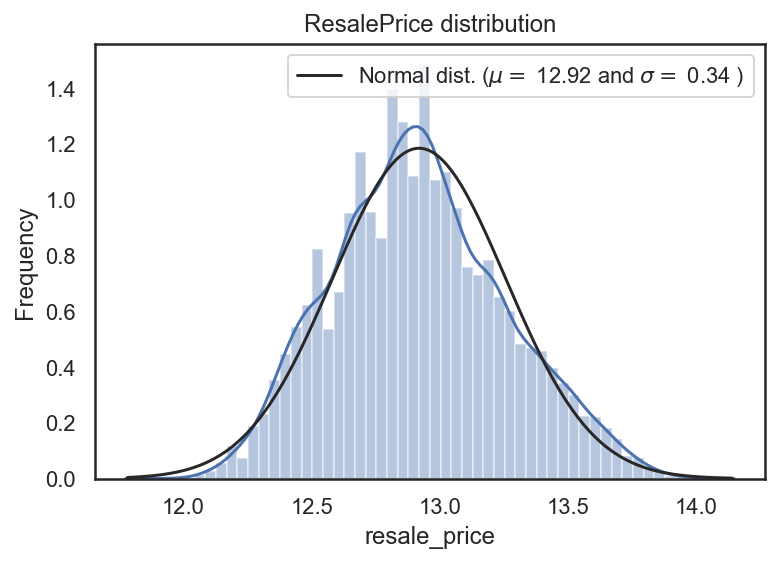

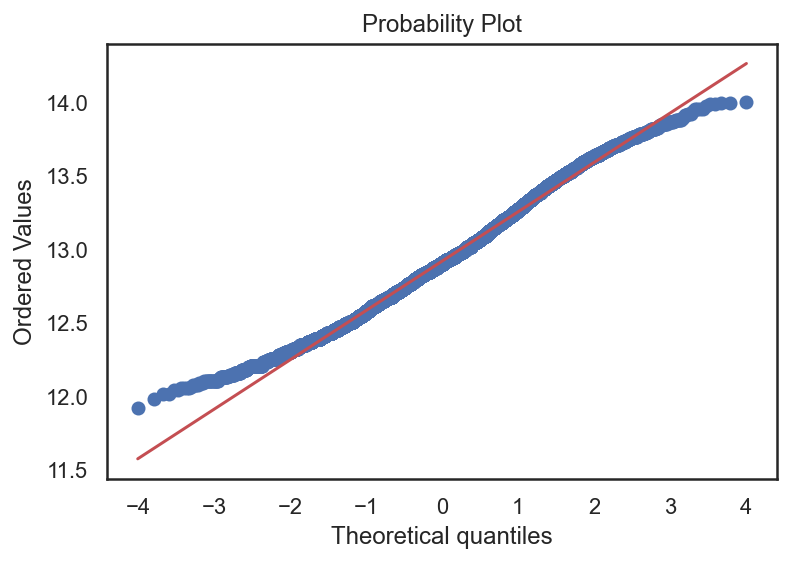

Skewness: 0.233683
Kurtosis: -0.301898


In [155]:
# Fixing skewed features
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["resale_price"] = np.log1p(df["resale_price"])
# use log1p instead of log because more accurate for smaller numbers of x i think, but shouldn't be an issue in this case
# https://stackoverflow.com/questions/49538185/what-is-the-purpose-of-numpy-log1p

#Check the new distribution 
sns.distplot(df["resale_price"], fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df["resale_price"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('ResalePrice distribution')

fig = plt.figure()
res = stats.probplot(df["resale_price"], plot=plt)
plt.show()

# y_train = df.resale_price.values

print("Skewness: %f" % df["resale_price"].skew())
print("Kurtosis: %f" % df["resale_price"].kurt())
# decreased as compared to the first plot

In [156]:
df['resale_price']

0        12.542548
1        12.669810
2        13.487008
3        13.429850
4        12.206078
           ...    
22181    12.650762
22182    12.889172
22183    12.861001
22184    12.506181
22185    12.751303
Name: resale_price, Length: 22186, dtype: float64

In [157]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness.head()

,Skewed Features
storey_range,1.450027
floor_area_sqm,0.240293
region_encoded,0.173569
remaining_lease,0.112120
lease_commence_date,0.112120


In [158]:
# Apply box cox on skewed numerical features
skewness = skewness[abs(skewness) > 0.75]
# doesn't this mean to take only features with values more than 0.75? above values < 0.75 but it still indicate those values

print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
from scipy.special import boxcox1p
# A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. 
# https://www.statisticshowto.com/box-cox-transformation/#:~:text=A%20Box%20Cox%20transformation%20is,a%20broader%20number%20of%20tests.

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)
    all_data[feat] += 1

There are 7 skewed numerical features to Box Cox transform


In [159]:
# converting categorical variables into numerical

# get_dummies method
# all_data = pd.get_dummies(all_data)
# get_dummies convert categorical variable into dummy/indicator variables e.g. flat_model_Simplified with 0s and 1s
# https://www.w3resource.com/pandas/get_dummies.php
# lightgbm gives the best rmse when using get_dummies method

# label encoder method
from sklearn import preprocessing
for column in all_data.columns:
    if df[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        all_data[column] = le.fit_transform(all_data[column])
# supposedly used for labels y and not x
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# gradient boost gives the best rmse when using label encoder
# overall best rmse when comparing the two methods as well

print(all_data.shape)
# all_data.head()
# (75473, 3712)
# (75473, 10)

(22186, 8)


In [160]:
target

array([12.54254845, 12.66980981, 13.48700788, ..., 12.86100121,
       12.50618094, 12.75130259])

In [161]:
all_data

,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,Month,house_age,flat_type_model,region_encoded
0,1.730463,6.914940,15.151449,6.684507,3.750250,5.926918,9,2.820334
1,1.730463,7.268453,15.149872,6.653921,3.055642,5.969939,9,2.540963
2,2.820334,7.844946,15.187527,7.291711,2.194318,4.530419,26,3.055642
3,2.540963,8.136866,15.176584,7.123681,3.055642,5.071754,26,3.055642
4,1.000000,6.210789,15.135652,6.357203,3.885846,6.321541,5,3.055642
...,...,...,...,...,...,...,...,...
22181,1.730463,6.914940,15.138816,6.426781,3.440268,6.248357,7,3.055642
22182,2.194318,8.037818,15.179714,7.172972,3.885846,4.932510,26,2.194318
22183,2.194318,7.469750,15.184404,7.244956,3.750250,4.701973,17,1.730463
22184,1.000000,6.887419,15.157749,6.802739,4.011340,5.745132,9,2.540963


In [162]:
# train = all_data[:5000]
# test = all_data[5000:10000]
# y_train = target[:5000]
# y_test = target[5000:10000]
# # from sklearn.model_selection import train_test_split


x = all_data
y = target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
random_state = 1)
train = x_train
test = x_test

In [163]:
# train

In [167]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [168]:
# Train set evaluation metrics with cross-validation
n_folds = 5

# def MAE_cv(model):
#     kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
#     MAE = -cross_val_score(model, train.values, y_train, scoring='neg_mean_absolute_error', cv = kf)
#     return MAE
    
# def MSE_cv(model):
#     kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
#     MSE = -cross_val_score(model, train.values, y_train, scoring='neg_mean_squared_error', cv = kf)
#     return MSE

def RMSE_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# def r2_cv(model):
#     kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
#     r2 = cross_val_score(model, train.values, y_train, scoring='r2', cv = kf)
#     return r2

# full list of scorers
# from sklearn.metrics import SCORERS
# sorted(SCORERS.keys())
# no adjusted r2

In [169]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1,
                             random_state =7)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [170]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  
    
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso, model_xgb, model_lgb))

In [171]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, clf in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(clf)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR, lasso, model_xgb, model_lgb),
                                                 meta_model = model_xgb)

In [172]:
# # Mean Absolute Error (MAE) Evaluation
# models = [lasso, ENet, KRR, GBoost, model_lgb, averaged_models, stacked_averaged_models]
# MAE_results = []
# for model in models:
#     MAE_results.append(MAE_cv(model))

# names = ['lasso', 'Enet', 'krr', 'gboost', 'lgb', 'averaged', 'stacked']
# plt.boxplot(MAE_results, labels=names, showmeans=True)
# plt.show()

In [173]:
# # Mean Squared Error (MSE) Evaluation
# MSE_results = []
# for model in models:
#     MSE_results.append(MSE_cv(model))
# plt.boxplot(MSE_results, labels=names, showmeans=True)
# plt.show()

In [174]:
# Root Mean Log Square Error (RMSLE) Evaluation
models = [lasso, ENet, KRR, GBoost,model_xgb, model_lgb, averaged_models, stacked_averaged_models]
names = ['lasso', 'Enet', 'krr', 'gboost', 'model_xgb', 'lgb', 'averaged', 'stacked']

RMSE_results = []
for model in models:
    RMSE_results.append(RMSE_cv(model))
plt.boxplot(RMSE_results, labels=names, showmeans=True)
plt.show()

[04:20:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:20:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[04:21:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[04:28:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[Li

[04:38:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[Li

KeyboardInterrupt: 

In [ ]:
# # R2 Evaluation
# r2_results = []
# for model in models:
#     r2_results.append(r2_cv(model))
# plt.boxplot(r2_results, labels=names, showmeans=True)
# plt.show()